In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
# Reading dataset

df_train = pd.read_csv('Train_data.csv')
df_test = pd.read_csv('Test_data.csv')

In [3]:
df_train.head(15)

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71
5,01-08-2020,campaign 1,adgroup 2,ad 2,7,2,0.04,0,0.00
6,01-08-2020,campaign 1,adgroup 4,ad 2,6,3,0.05,0,0.00
7,01-08-2020,campaign 1,adgroup 1,ad 3,129,52,0.58,0,0.00
8,01-08-2020,campaign 1,adgroup 3,ad 3,104,56,0.56,0,0.00
9,01-08-2020,campaign 1,adgroup 4,ad 3,6,5,0.05,0,0.00


In [4]:
df_train.isna().sum()

date           0
campaign       0
adgroup        0
ad             0
impressions    0
clicks         0
cost           0
conversions    0
revenue        0
dtype: int64

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4571 entries, 0 to 4570
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         4571 non-null   object 
 1   campaign     4571 non-null   object 
 2   adgroup      4571 non-null   object 
 3   ad           4571 non-null   object 
 4   impressions  4571 non-null   int64  
 5   clicks       4571 non-null   int64  
 6   cost         4571 non-null   float64
 7   conversions  4571 non-null   int64  
 8   revenue      4571 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 321.5+ KB


In [6]:
X_train = df_train.drop(columns=['date','campaign','adgroup','ad','revenue'], axis=1)
Y_train = df_train.revenue

In [7]:
X_train.head()

,impressions,clicks,cost,conversions
0,24,6,0.08,0
1,1,0,0.00,0
2,13,4,0.04,0
3,5,4,0.08,0
4,247,126,1.29,4


In [8]:
Y_train

0         0.00
1         0.00
2         0.00
3         0.00
4       925.71
         ...  
4566      0.00
4567      0.00
4568     93.20
4569      0.00
4570      0.00
Name: revenue, Length: 4571, dtype: float64

In [9]:
learning_rates = [1, 0.75, 0.5, 0.25, 0.1, 0.05, 0.01]
train_error = []
for eta in learning_rates:
    model = GradientBoostingRegressor(learning_rate=eta)
    model.fit(X_train, Y_train)
    score = model.score(X_train,Y_train)
    Y_pred = model.predict(X_train)
    train_error.append(mean_squared_error(Y_train, Y_pred))
    print('Learning_rate, Score = ', (eta,  score))

Learning_rate, Score =  (1, 0.9964758354515576)
Learning_rate, Score =  (0.75, 0.9959030461714491)
Learning_rate, Score =  (0.5, 0.9945803051310435)
Learning_rate, Score =  (0.25, 0.9911894257399301)
Learning_rate, Score =  (0.1, 0.9860293664181222)
Learning_rate, Score =  (0.05, 0.981784820165735)
Learning_rate, Score =  (0.01, 0.8316171263659629)


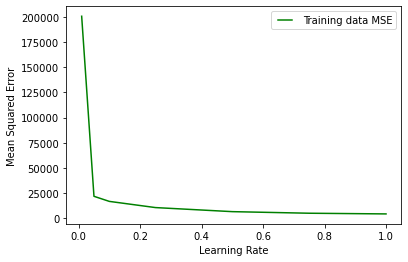

In [10]:
line1, = plt.plot(learning_rates, train_error, 'g', label="Training data MSE")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Mean Squared Error')
plt.xlabel('Learning Rate')
plt.show()

In [11]:
n_estimators = [ 1, 2, 4, 8, 10, 20, 50, 100, 200 ]
train_error = []
for estimator in n_estimators:
    model = GradientBoostingRegressor(n_estimators=estimator)
    model.fit(X_train, Y_train)
    score = model.score(X_train,Y_train)
    Y_pred = model.predict(X_train)
    train_error.append(mean_squared_error(Y_train, Y_pred))
    print('No. of estimators , Score = ', (estimator,  score))

No. of estimators , Score =  (1, 0.18003810340870274)
No. of estimators , Score =  (2, 0.32608463490915984)
No. of estimators , Score =  (4, 0.5414104248064093)
No. of estimators , Score =  (8, 0.7802059049610226)
No. of estimators , Score =  (10, 0.8437115412678609)
No. of estimators , Score =  (20, 0.9581139816826252)
No. of estimators , Score =  (50, 0.9819213978239578)
No. of estimators , Score =  (100, 0.9860293664181222)
No. of estimators , Score =  (200, 0.9897318082193204)


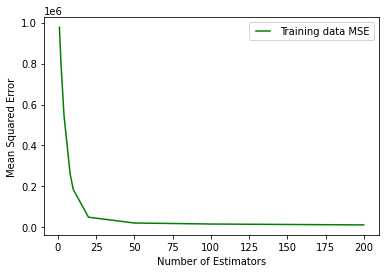

In [12]:
line1, = plt.plot(n_estimators, train_error, 'g', label="Training data MSE")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Mean Squared Error')
plt.xlabel('Number of Estimators')
plt.show()

In [13]:
min_samples_splits=[2,3,4,5,6,7,8,9,10]
train_error = []
for mss in min_samples_splits:
    model = GradientBoostingRegressor(min_samples_split=mss)
    model.fit(X_train, Y_train)
    score = model.score(X_train,Y_train)
    Y_pred = model.predict(X_train)
    train_error.append(mean_squared_error(Y_train, Y_pred))
    print('Minimum_sample_split , Score = ', (mss,  score))

Minimum_sample_split , Score =  (2, 0.9860293664181222)
Minimum_sample_split , Score =  (3, 0.9859513533395192)
Minimum_sample_split , Score =  (4, 0.985975927868806)
Minimum_sample_split , Score =  (5, 0.9859483218481307)
Minimum_sample_split , Score =  (6, 0.9858290049921394)
Minimum_sample_split , Score =  (7, 0.9857126156664556)
Minimum_sample_split , Score =  (8, 0.9854100233603935)
Minimum_sample_split , Score =  (9, 0.9852832363534056)
Minimum_sample_split , Score =  (10, 0.9851934958298026)


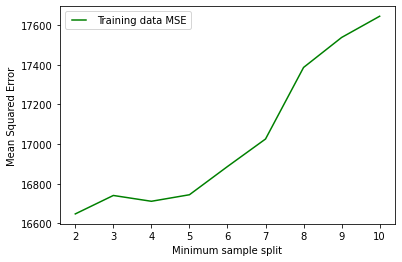

In [14]:
line1, = plt.plot(min_samples_splits, train_error, 'g', label="Training data MSE")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Mean Squared Error')
plt.xlabel('Minimum sample split')
plt.show()

In [15]:
max_depths = [1,2,4,6,8,10,12,14,16,18,20]
train_error = []
for max_d in max_depths:
    model = GradientBoostingRegressor(max_depth=max_d)
    model.fit(X_train, Y_train)
    score = model.score(X_train,Y_train)
    Y_pred = model.predict(X_train)
    train_error.append(mean_squared_error(Y_train, Y_pred))
    print('Maximum_depth , Score = ', (max_d,  score))

Maximum_depth , Score =  (1, 0.9638602080800277)
Maximum_depth , Score =  (2, 0.9811342877688407)
Maximum_depth , Score =  (4, 0.990232053989779)
Maximum_depth , Score =  (6, 0.9952262770185067)
Maximum_depth , Score =  (8, 0.9982078336110363)
Maximum_depth , Score =  (10, 0.9996112512550821)
Maximum_depth , Score =  (12, 0.999904907439143)
Maximum_depth , Score =  (14, 0.9999788871742049)
Maximum_depth , Score =  (16, 0.9999884792667185)
Maximum_depth , Score =  (18, 0.9999889053200918)
Maximum_depth , Score =  (20, 0.9999889450497105)


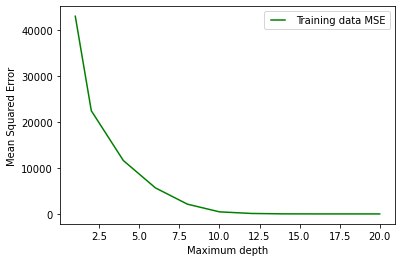

In [16]:
line1, = plt.plot(max_depths, train_error, 'g', label="Training data MSE")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Mean Squared Error')
plt.xlabel('Maximum depth')
plt.show()

In [17]:
min_samples_leafs = [1,2,3,4,5,6,7,8,9,10]
train_error = []
for msl in min_samples_leafs:
    model = GradientBoostingRegressor(min_samples_leaf=msl)
    model.fit(X_train, Y_train)
    score = model.score(X_train,Y_train)
    Y_pred = model.predict(X_train)
    train_error.append(mean_squared_error(Y_train, Y_pred))
    print('Minimum sample leaf , Score = ', (msl,  score))

Minimum sample leaf , Score =  (1, 0.9860293664181222)
Minimum sample leaf , Score =  (2, 0.9858072889646973)
Minimum sample leaf , Score =  (3, 0.9856530196282813)
Minimum sample leaf , Score =  (4, 0.9844933578971956)
Minimum sample leaf , Score =  (5, 0.9839210149793756)
Minimum sample leaf , Score =  (6, 0.9820854998922391)
Minimum sample leaf , Score =  (7, 0.980945043820294)
Minimum sample leaf , Score =  (8, 0.9808844492008209)
Minimum sample leaf , Score =  (9, 0.9802669043784863)
Minimum sample leaf , Score =  (10, 0.9774840778477603)


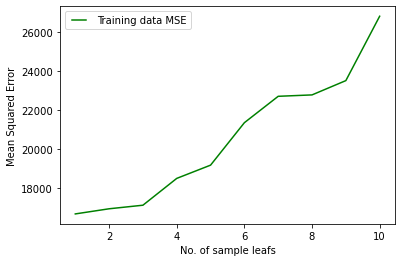

In [18]:
line1, = plt.plot(min_samples_leafs, train_error, 'g', label="Training data MSE")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Mean Squared Error')
plt.xlabel('No. of sample leafs')
plt.show()

In [19]:
parameters = {'n_estimators':50, 'learning_rate':0.25, 'min_samples_split':2, 'min_samples_leaf':2, 'max_depth':10}
GBR = GradientBoostingRegressor(**parameters)
GBR.fit(X_train, Y_train)

GradientBoostingRegressor(learning_rate=0.25, max_depth=10, min_samples_leaf=2,
                          n_estimators=50)

In [20]:
X_test = df_test.drop(columns=['date','campaign','adgroup','ad'], axis=1)
Y_test = GBR.predict(X_test)

In [21]:
prediction_gbr = pd.DataFrame()
prediction_gbr['revenue'] = Y_test
prediction_gbr.head(15)

,revenue
0,226.420281
1,22.618964
2,1.087598
3,0.225301
4,0.225301
5,-1.685929
6,173.650984
7,0.035834
8,310.276551
9,-15.795699


In [22]:
prediction_gbr.to_csv("Submission_gbr.csv", index = False)